### S&P 500 data returns processing for the 3 models

In [1]:
import pandas as pd

In [2]:
stocks=pd.read_csv('/home/ubuntu/Projects/TS_model/TM_Model/s&preturns.csv',index_col=0)
stocks

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04 00:00:00,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000150,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05 00:00:00,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006670,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-08 00:00:00,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.013314,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23 00:00:00,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.060234,-0.004402,0.013623,-0.034509,-0.001917,-0.025647,-0.036593,-0.031807,0.046280,-0.038157
2023-05-24 00:00:00,-0.059468,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.007754,-0.007013,0.011184,-0.024179,-0.029576,-0.004412,-0.013045,-0.036244,-0.014291,-0.020444
2023-05-25 00:00:00,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.071905,...,-0.000692,-0.012897,-0.017938,-0.005925,-0.021472,-0.004661,-0.006375,-0.006504,-0.022437,-0.023058


In [3]:
stocks.index = pd.to_datetime(stocks.index)

to fill ta NaN value we are taking 3 days rolling mean, and only mean for the remaining Nan

In [4]:
returns_rolling_avg = stocks.rolling(window=10).mean()

# Fill missing values with the rolling average
stocks = stocks.apply(lambda x: x.fillna(x.mean()))

In [5]:
daily_avg = stocks.mean(1)
stocks = stocks.apply(lambda x: x.fillna(daily_avg))

In [6]:
stocks

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000608,-0.000219,0.000328,0.001294,0.000584,0.000653,0.000609,0.000856,0.000729,0.000906,...,0.000289,0.000440,0.000576,-0.000172,0.000517,0.000532,0.000255,0.001032,0.000078,0.000774
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000150,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006670,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.013314,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.060234,-0.004402,0.013623,-0.034509,-0.001917,-0.025647,-0.036593,-0.031807,0.046280,-0.038157
2023-05-24,-0.059468,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.007754,-0.007013,0.011184,-0.024179,-0.029576,-0.004412,-0.013045,-0.036244,-0.014291,-0.020444
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.071905,...,-0.000692,-0.012897,-0.017938,-0.005925,-0.021472,-0.004661,-0.006375,-0.006504,-0.022437,-0.023058


checking if any Nan value remain there

In [7]:
nan_values = stocks.isnull().sum()

# Print columns with NaN values
columns_with_nan = nan_values[nan_values > 0].index.tolist()
print("Columns with NaN values:")
print(columns_with_nan)

# Print total count of NaN values
total_nan_count = nan_values.sum()
print("Total NaN values:", total_nan_count)

Columns with NaN values:
[]
Total NaN values: 0


Splitting the datasets into 80% and 20% 

In [8]:
train_size = 0.8  # 80% of the data for training, 20% for testing

train_index = int(len(stocks) * train_size)  # Calculate the index to split the data

df_train = stocks[:train_index]  # Select the first 80% for training
df_test = stocks[train_index:]  # Select the last 20% for testing


In [9]:
print("Training set shape:", df_train.shape)
print("Testing set shape:", df_test.shape)

Training set shape: (1088, 503)
Testing set shape: (273, 503)


### Preparing datasets for running Phophet models

In [10]:
df_prophet = df_train

In [11]:
df_prophet.reset_index(inplace=True)

In [44]:
df_prophet.rename(columns={'Date': 'ds'}, inplace=True)

/tmp/ipykernel_21605/172301028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prophet.rename(columns={'Date': 'ds'}, inplace=True)


In [45]:
from prophet import Prophet

In [46]:
df_prophet = df_prophet.melt(id_vars=['ds'], var_name='stock', value_name='y')

In [128]:
df_prophet

,ds,stock,y
0,2018-01-02,A,0.000608
1,2018-01-03,A,0.025444
2,2018-01-04,A,-0.007501
3,2018-01-05,A,0.015988
4,2018-01-08,A,0.002146
...,...,...,...
547259,2022-04-21,ZTS,-0.016296
547260,2022-04-22,ZTS,-0.014996
547261,2022-04-25,ZTS,-0.009068
547262,2022-04-26,ZTS,-0.018469


In [129]:
df_prophet.to_csv('snp_phophet_train.csv',index=False)

In [48]:
prophet_models = {}

In [49]:
for stock in df_prophet['stock'].unique():
    # Filter data for the specific stock
    df_stock = df_prophet[df_prophet['stock'] == stock]

    # Create a new Prophet model for the stock
    model = Prophet()

    # Fit the model to the stock's data
    model.fit(df_stock)

    # Store the fitted model in the dictionary
    prophet_models[stock] = model

13:40:02 - cmdstanpy - INFO - Chain [1] start processing
13:40:02 - cmdstanpy - INFO - Chain [1] done processing
13:40:02 - cmdstanpy - INFO - Chain [1] start processing
13:40:02 - cmdstanpy - INFO - Chain [1] done processing
13:40:02 - cmdstanpy - INFO - Chain [1] start processing
13:40:02 - cmdstanpy - INFO - Chain [1] done processing
13:40:02 - cmdstanpy - INFO - Chain [1] start processing
13:40:02 - cmdstanpy - INFO - Chain [1] done processing
13:40:02 - cmdstanpy - INFO - Chain [1] start processing
13:40:03 - cmdstanpy - INFO - Chain [1] done processing
13:40:03 - cmdstanpy - INFO - Chain [1] start processing
13:40:03 - cmdstanpy - INFO - Chain [1] done processing
13:40:03 - cmdstanpy - INFO - Chain [1] start processing
13:40:03 - cmdstanpy - INFO - Chain [1] done processing
13:40:03 - cmdstanpy - INFO - Chain [1] start processing
13:40:03 - cmdstanpy - INFO - Chain [1] done processing
13:40:03 - cmdstanpy - INFO - Chain [1] start processing
13:40:03 - cmdstanpy - INFO - Chain [1]

making the test data for evaluation

In [119]:
df_test

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-28,0.028722,0.024249,-0.068881,0.045155,-0.008311,0.001842,0.011052,-0.024411,0.035434,0.031742,...,0.041060,0.026175,0.030246,-0.002482,0.015833,0.022412,0.014079,0.031985,0.035351,0.015913
2022-04-29,-0.014786,-0.033968,-0.046612,-0.036605,-0.060329,-0.040951,-0.038217,-0.023311,-0.042952,-0.035515,...,-0.003675,-0.021635,-0.022362,-0.004976,-0.034888,-0.021001,-0.030977,-0.034780,-0.025522,-0.022393
2022-05-02,0.002515,-0.011188,0.004308,0.001966,0.006740,-0.015335,-0.005903,0.004598,0.014117,0.028640,...,0.017452,-0.008054,0.013607,-0.008502,0.016522,-0.010683,-0.000828,0.026808,0.008848,-0.014556
2022-05-03,0.023668,0.030711,-0.002843,0.009623,0.011699,0.012016,-0.003545,0.011988,0.000722,0.000712,...,-0.000279,-0.007431,0.020599,0.025977,0.006599,-0.005961,0.000249,-0.030113,0.008069,0.002691
2022-05-04,0.031863,0.025614,0.038566,0.041008,0.013302,0.039997,0.029085,0.018953,0.032937,0.038692,...,0.003766,0.017607,0.039800,0.031219,0.096273,0.029721,0.046735,-0.000733,0.034975,0.009821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.060234,-0.004402,0.013623,-0.034509,-0.001917,-0.025647,-0.036593,-0.031807,0.046280,-0.038157
2023-05-24,-0.059468,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.007754,-0.007013,0.011184,-0.024179,-0.029576,-0.004412,-0.013045,-0.036244,-0.014291,-0.020444
2023-05-25,-0.012398,0.042029,-0.031329,0.006692,-0.017924,-0.005203,-0.018262,0.008499,0.017223,0.071905,...,-0.000692,-0.012897,-0.017938,-0.005925,-0.021472,-0.004661,-0.006375,-0.006504,-0.022437,-0.023058


In [120]:
df_stock_test = df_test

In [121]:
df_stock_test.reset_index(inplace=True)

In [122]:
df_stock_test.rename(columns={'Date': 'ds'}, inplace=True)

/tmp/ipykernel_21605/1390001003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test.rename(columns={'Date': 'ds'}, inplace=True)


In [123]:
df_stock_test = df_stock_test.melt(id_vars=['ds'], var_name='stock', value_name='y')

In [126]:
df_stock_test

,ds,stock,y
0,2022-04-28,A,0.028722
1,2022-04-29,A,-0.014786
2,2022-05-02,A,0.002515
3,2022-05-03,A,0.023668
4,2022-05-04,A,0.031863
...,...,...,...
137314,2023-05-23,ZTS,-0.038157
137315,2023-05-24,ZTS,-0.020444
137316,2023-05-25,ZTS,-0.023058
137317,2023-05-26,ZTS,-0.003026


In [127]:
df_stock_test.to_csv('snp_phophet_test.csv',index=False)

In [115]:
stock_list =[]
for x in df_stock_test['stock'].unique():
    stock_list.append(x)

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [125]:
for stock in stock_list:
    # Filter data for the specific stock
    df_stock_t = df_stock_test[df_stock_test['stock'] == stock]

    # Retrieve the corresponding fitted Prophet model
    model = prophet_models[stock]

    # Make predictions for the test dataset
    future = model.make_future_dataframe(periods=len(df_stock_t))
    forecast = model.predict(future)

    # Extract the relevant columns from the forecast for evaluation
    predicted_values = forecast[['ds', 'yhat']].tail(len(df_stock_t))

    # Compare the predicted values with the actual values
    actual_values = df_stock_test[['ds', 'y']]
    evaluation_df = pd.merge(actual_values, predicted_values, on='ds', suffixes=('_actual', '_predicted'))
   
    # Calculate evaluation metrics (e.g., MAE, RMSE)
    mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
    rmse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'], squared=False)

    # Print or store the evaluation metrics
    print(f"Stock: {stock}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")


Stock: A
MAE: 0.016930740534381237
RMSE: 0.023580553544614646
Stock: AAL
MAE: 0.017655023856563375
RMSE: 0.02435753925802256
Stock: AAP
MAE: 0.017036487024390132
RMSE: 0.02368668974156557
Stock: AAPL
MAE: 0.01720989456810415
RMSE: 0.02380969396752789
Stock: ABBV
MAE: 0.017166464146295277
RMSE: 0.023788905975223963
Stock: ABC
MAE: 0.016973942999199583
RMSE: 0.02361360210539299
Stock: ABT
MAE: 0.01698271281126651
RMSE: 0.023560375871697462
Stock: ACGL
MAE: 0.016935545784665912
RMSE: 0.023515435429960662
Stock: ACN
MAE: 0.01695987852321125
RMSE: 0.023567327406359608
Stock: ADBE
MAE: 0.017025070291480683
RMSE: 0.023675889868145186
Stock: ADI
MAE: 0.016967909214630417
RMSE: 0.023612006002151197
Stock: ADM
MAE: 0.01700733761990491
RMSE: 0.02363522520748834
Stock: ADP
MAE: 0.017031630183990065
RMSE: 0.023627014870241804
Stock: ADSK
MAE: 0.016999333765778387
RMSE: 0.02362723262306302
Stock: AEE
MAE: 0.01688564533609987
RMSE: 0.02348998750537073
Stock: AEP
MAE: 0.016907998584953524
RMSE: 0.0235

KeyboardInterrupt: 

### Data for AutoTS

In [1]:
df_train

NameError: name 'df_train' is not defined

In [11]:
from autots import AutoTS

In [14]:
model = AutoTS(
    forecast_length=len(df_test),
    frequency='infer',
    prediction_interval=0.9,
    ensemble=None,
    model_list="superfast",  # "fast", "default", "fast_parallel"
    transformer_list="superfast",  # "superfast",
    drop_most_recent=1,
    max_generations=3,
    num_validations=2,
    validation_method="backwards"
)

In [15]:
model = model.fit(df_train)

Inferred frequency is: None
Frequency is 'None'! Input frequency not recognized.
Model Number: 1 with model AverageValueNaive in generation 0 of 3
Model Number: 2 with model AverageValueNaive in generation 0 of 3
Model Number: 3 with model AverageValueNaive in generation 0 of 3
Model Number: 4 with model GLS in generation 0 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 5 with model GLS in generation 0 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 6 with model LastValueNaive in generation 0 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 7 with model LastValueNaive in generation 0 of 3
Model Number: 8 with model LastValueNaive in generation 0 of 3
Model Number: 9 with model LastValueNaive in generation 0 of 3
Model Number: 10 with model SeasonalNaive in generation 0 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 11 with model SeasonalNaive in generation 0 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 12 with model SeasonalNaive in generation 0 of 3
Model Number: 13 with model ConstantNaive in generation 0 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 14 with model SeasonalNaive in generation 0 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 15 with model SeasonalNaive in generation 0 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 16 with model ConstantNaive in generation 0 of 3
Model Number: 17 with model LastValueNaive in generation 0 of 3
Model Number: 18 with model AverageValueNaive in generation 0 of 3
Model Number: 19 with model GLS in generation 0 of 3
Model Number: 20 with model SeasonalNaive in generation 0 of 3
Model Number: 21 with model SeasonalityMotif in generation 0 of 3
Model Number: 22 with model GLS in generation 0 of 3
Model Number: 23 with model LastValueNaive in generation 0 of 3
Model Number: 24 with model AverageValueNaive in generation 0 of 3
Model Number: 25 with model LastValueNaive in generation 0 of 3
Model Number: 26 with model SeasonalNaive in generation 0 of 3
Model Number: 27 with model AverageValueNaive in generation 0 of 3
Model Number: 28 with model ConstantNaive in generation 0 of 3
Model Number: 29 with model SeasonalityMotif in generation 0 of 3
Model Number: 30 with model SeasonalNaive in generation 0 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 31 with model LastValueNaive in generation 0 of 3
Model Number: 32 with model ConstantNaive in generation 0 of 3
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'AlignLastValue', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'rows': 7, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': True}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 32 in generation 0: ConstantNaive
Model Number: 33 with model LastValueNaive in generation 0 of 3
Model Number: 34 with model AverageValueNaive in generation 0 of 3
Model Number: 35 with model SeasonalityMotif in generation 0 of 3
Model Number: 36 with mo

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 38 with model ConstantNaive in generation 0 of 3
Model Number: 39 with model AverageValueNaive in generation 0 of 3
Model Number: 40 with model SeasonalNaive in generation 0 of 3
Model Number: 41 with model AverageValueNaive in generation 0 of 3
Model Number: 42 with model GLS in generation 0 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 43 with model SeasonalityMotif in generation 0 of 3
Model Number: 44 with model ConstantNaive in generation 0 of 3
Model Number: 45 with model SeasonalityMotif in generation 0 of 3
New Generation: 1 of 3
Model Number: 46 with model SeasonalNaive in generation 1 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 47 with model LastValueNaive in generation 1 of 3
Model Number: 48 with model SeasonalityMotif in generation 1 of 3
Model Number: 49 with model ConstantNaive in generation 1 of 3
Model Number: 50 with model SeasonalityMotif in generation 1 of 3
Model Number: 51 with model GLS in generation 1 of 3
Model Number: 52 with model SeasonalityMotif in generation 1 of 3
Model Number: 53 with model SeasonalityMotif in generation 1 of 3
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 53 in generation 1: SeasonalityMotif
Model Number: 54 with model SeasonalityMotif in generation 1 of 3
Model Number: 55 with model AverageValueNaive in generation 1 of 3
Model Number: 56 with model SeasonalityMotif in generation 1 of 3
Model Number: 57 with model LastValueNaive in generation 1 of 3
Model Number: 58 with model SeasonalNaive in generation 1 of 3
Model Number: 59 with model ConstantNaive in generation 1 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 60 with model SeasonalNaive in generation 1 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 61 with model ConstantNaive in generation 1 of 3
Model Number: 62 with model SeasonalNaive in generation 1 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 63 with model ConstantNaive in generation 1 of 3
Model Number: 64 with model AverageValueNaive in generation 1 of 3
Model Number: 65 with model AverageValueNaive in generation 1 of 3
Model Number: 66 with model AverageValueNaive in generation 1 of 3
Model Number: 67 with model LastValueNaive in generation 1 of 3
Model Number: 68 with model LastValueNaive in generation 1 of 3
Model Number: 69 with model SeasonalNaive in generation 1 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 70 with model ConstantNaive in generation 1 of 3
Model Number: 71 with model LastValueNaive in generation 1 of 3
Model Number: 72 with model AverageValueNaive in generation 1 of 3
Model Number: 73 with model SeasonalNaive in generation 1 of 3
Model Number: 74 with model GLS in generation 1 of 3
Model Number: 75 with model SeasonalNaive in generation 1 of 3
New Generation: 2 of 3
Model Number: 76 with model LastValueNaive in generation 2 of 3
Model Number: 77 with model AverageValueNaive in generation 2 of 3
Model Number: 78 with model AverageValueNaive in generation 2 of 3
Model Number: 79 with model SeasonalNaive in generation 2 of 3
Model Number: 80 with model AverageValueNaive in generation 2 of 3
Model Number: 81 with model SeasonalNaive in generation 2 of 3
Model Number: 82 with model SeasonalityMotif in generation 2 of 3
Model Number: 83 with model SeasonalityMotif in generation 2 of 3
Model Number: 84 with model GLS in generation 2 of 3
Model Number: 85 with model 

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 95 with model SeasonalityMotif in generation 2 of 3
Model Number: 96 with model SeasonalityMotif in generation 2 of 3
Model Number: 97 with model SeasonalNaive in generation 2 of 3
Model Number: 98 with model SeasonalNaive in generation 2 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 99 with model AverageValueNaive in generation 2 of 3
Model Number: 100 with model LastValueNaive in generation 2 of 3
Model Number: 101 with model GLS in generation 2 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 102 with model SeasonalNaive in generation 2 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 103 with model ConstantNaive in generation 2 of 3
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 103 in generation 2: ConstantNaive
Model Number: 104 with model LastValueNaive in generation 2 of 3
Model Number: 105 with model SeasonalNaive in generation 2 of 3
New Generation: 3 of 3
Model Number: 106 with model SeasonalityMotif in generation 3 of 3
Model Number: 107 with model GLS in generation 3 of 3
Model Number: 108 with model SeasonalNaive in generation 3 of 3
Model Number: 109 with model GLS in generation 3 of 3
Model Number: 110 with model AverageValueNaive in generation 3 of 3
Model Number: 111 with model SeasonalNaive in generation 3 of 3
Model Number: 112 with model SeasonalityMotif in generation 3 of 3
Model Number: 113 with model SeasonalityMotif in generation 3 of 3
Model Number: 114 with model SeasonalityMotif in generation 3 of 3
Model Number: 115 with model ConstantNaive in generation 3 of 3
Model Number: 116 with mo

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 128 with model AverageValueNaive in generation 3 of 3
Model Number: 129 with model GLS in generation 3 of 3
Model Number: 130 with model SeasonalityMotif in generation 3 of 3
Model Number: 131 with model SeasonalityMotif in generation 3 of 3
Model Number: 132 with model SeasonalNaive in generation 3 of 3
Model Number: 133 with model GLS in generation 3 of 3


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 134 with model LastValueNaive in generation 3 of 3
Model Number: 135 with model SeasonalityMotif in generation 3 of 3
Validation Round: 1
Model Number: 1 of 21 with model SeasonalityMotif for Validation 1
📈 1 - SeasonalityMotif with avg smape 152.09: 
Model Number: 2 of 21 with model SeasonalityMotif for Validation 1
2 - SeasonalityMotif with avg smape 152.28: 
Model Number: 3 of 21 with model SeasonalityMotif for Validation 1
📈 3 - SeasonalityMotif with avg smape 149.31: 
Model Number: 4 of 21 with model SeasonalityMotif for Validation 1
4 - SeasonalityMotif with avg smape 150.02: 
Model Number: 5 of 21 with model SeasonalityMotif for Validation 1
5 - SeasonalityMotif with avg smape 150.9: 
Model Number: 6 of 21 with model SeasonalNaive for Validation 1
📈 6 - SeasonalNaive with avg smape 147.34: 
Model Number: 7 of 21 with model SeasonalNaive for Validation 1
7 - SeasonalNaive with avg smape 149.2: 
Model Number: 8 of 21 with model AverageValueNaive for Validation 1
8 - 

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


11 - SeasonalNaive with avg smape 164.54: 
Model Number: 12 of 21 with model SeasonalNaive for Validation 1
12 - SeasonalNaive with avg smape 160.82: 
Model Number: 13 of 21 with model AverageValueNaive for Validation 1
13 - AverageValueNaive with avg smape 169.53: 
Model Number: 14 of 21 with model AverageValueNaive for Validation 1
14 - AverageValueNaive with avg smape 164.96: 
Model Number: 15 of 21 with model GLS for Validation 1


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


15 - GLS with avg smape 167.94: 
Model Number: 16 of 21 with model GLS for Validation 1


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


16 - GLS with avg smape 171.07: 
Model Number: 17 of 21 with model SeasonalNaive for Validation 1


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


17 - SeasonalNaive with avg smape 147.61: 
Model Number: 18 of 21 with model GLS for Validation 1


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


18 - GLS with avg smape 174.8: 
Model Number: 19 of 21 with model GLS for Validation 1


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


📈 19 - GLS with avg smape 147.26: 
Model Number: 20 of 21 with model GLS for Validation 1


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


📈 20 - GLS with avg smape 143.97: 
Model Number: 21 of 21 with model LastValueNaive for Validation 1
21 - LastValueNaive with avg smape 149.1: 
Validation Round: 2
Model Number: 1 of 21 with model SeasonalityMotif for Validation 2
📈 1 - SeasonalityMotif with avg smape 163.74: 
Model Number: 2 of 21 with model SeasonalityMotif for Validation 2
📈 2 - SeasonalityMotif with avg smape 160.97: 
Model Number: 3 of 21 with model SeasonalityMotif for Validation 2
📈 3 - SeasonalityMotif with avg smape 159.49: 
Model Number: 4 of 21 with model SeasonalityMotif for Validation 2
📈 4 - SeasonalityMotif with avg smape 158.38: 
Model Number: 5 of 21 with model SeasonalityMotif for Validation 2
5 - SeasonalityMotif with avg smape 160.58: 
Model Number: 6 of 21 with model SeasonalNaive for Validation 2
📈 6 - SeasonalNaive with avg smape 151.5: 
Model Number: 7 of 21 with model SeasonalNaive for Validation 2
7 - SeasonalNaive with avg smape 160.18: 
Model Number: 8 of 21 with model AverageValueNaive for 

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


11 - SeasonalNaive with avg smape 171.62: 
Model Number: 12 of 21 with model SeasonalNaive for Validation 2
12 - SeasonalNaive with avg smape 169.36: 
Model Number: 13 of 21 with model AverageValueNaive for Validation 2
13 - AverageValueNaive with avg smape 175.46: 
Model Number: 14 of 21 with model AverageValueNaive for Validation 2
14 - AverageValueNaive with avg smape 173.56: 
Model Number: 15 of 21 with model GLS for Validation 2


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


15 - GLS with avg smape 174.41: 
Model Number: 16 of 21 with model GLS for Validation 2


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


16 - GLS with avg smape 176.92: 
Model Number: 17 of 21 with model SeasonalNaive for Validation 2


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


17 - SeasonalNaive with avg smape 165.68: 
Model Number: 18 of 21 with model GLS for Validation 2


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


18 - GLS with avg smape 181.07: 
Model Number: 19 of 21 with model GLS for Validation 2


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


📈 19 - GLS with avg smape 144.28: 
Model Number: 20 of 21 with model GLS for Validation 2


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


20 - GLS with avg smape 150.97: 
Model Number: 21 of 21 with model LastValueNaive for Validation 2
21 - LastValueNaive with avg smape 145.69: 


In [16]:
prediction = model.predict()

Initiated AutoTS object with best model: 
SeasonalNaive
{'fillna': 'ffill_mean_biased', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}}}
{'method': 'mean', 'lag_1': 364, 'lag_2': 96}
Validation: 0, 1, 2
SMAPE: 153.53077666825072, 149.19750703573268, 160.18375248035136
MAE: 0.014908718839340012, 0.0151364228587892, 0.0249914097040766
SPL: 0.4414367710299711, 0.3403347067036378, 1.0789453075498976


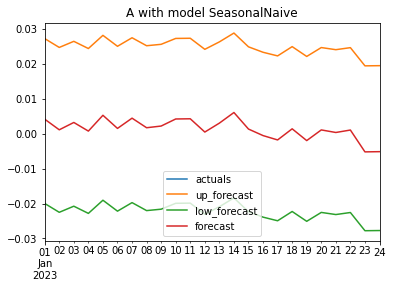

In [17]:
prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[0],
                start_date="2023-01-01")
# Print the details of the best model
print(model)

In [18]:
forecasts_df = prediction.forecast

In [19]:
forecasts_up, forecasts_low = prediction.upper_forecast, prediction.lower_forecast

In [20]:
model_results = model.results()

In [21]:
validation_results = model.results("validation")

In [22]:
validation_results

,ID,Model,ModelParameters,TransformationParameters,Ensemble,Runs,smape,mae,rmse,made,...,uwmse_weighted,smoothness_weighted,containment_weighted,contour_weighted,TotalRuntimeSeconds,Score,lowest_series_mape,lowest_series_mape_name,highest_series_mape,highest_series_mape_name
0,007e9045893d8d2ff8872f59389becfa,SeasonalNaive,"{""method"": ""lastvalue"", ""lag_1"": 2, ""lag_2"": 96}","{""fillna"": ""ffill_mean_biased"", ""transformatio...",0,1,149.440043,0.016001,0.021016,1.367834,...,1.068469e-01,1.975631e-02,0.598868,0.488796,1.189000,16.332345,-1.035974e+05,LUV,1.997620e+05,BWA
1,014b86e391fc38c523f2651fa96ab8d1,SeasonalityMotif,"{""window"": 5, ""point_method"": ""median"", ""dista...","{""fillna"": ""rolling_mean"", ""transformations"": ...",0,1,145.757778,0.017426,0.022313,1.207820,...,1.026002e-01,3.237308e-03,0.023296,0.485330,0.305600,22.010530,-9.716676e+04,LUV,1.798677e+05,IVZ
2,01e440ab2a1f5d0560871ccbfdb94ee6,GLS,{},"{""fillna"": ""median"", ""transformations"": {""0"": ...",0,1,172.635119,0.014079,0.018949,1.200417,...,8.669924e-02,0.000000e+00,0.637639,0.273990,4.857400,16.935421,-9.121728e+04,LUV,1.712984e+05,BWA
3,0259f3c5f4a8ea60922f00ca9d0b53f9,GLS,{},"{""fillna"": ""ffill_mean_biased"", ""transformatio...",0,3,145.713049,0.022922,0.029949,1.574441,...,1.748575e-01,2.604526e-03,0.431562,0.502283,1.369567,21.063898,-2.067384e+05,LUV,4.285826e+05,BWA
4,034305f1c5a1748476f402af97ea4767,SeasonalityMotif,"{""window"": 10, ""point_method"": ""midhinge"", ""di...","{""fillna"": ""ffill_mean_biased"", ""transformatio...",0,1,197.613211,270.987538,373.618365,177.095528,...,5.183274e+07,2.391040e-02,0.339589,0.518173,0.296700,172960.503485,-3.451366e+09,LUV,3.907263e+09,BWA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,f374e54c289b66ee53097a13b0116bb6,AverageValueNaive,"{""method"": ""Mean"", ""window"": null}","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0,1,172.619758,0.014123,0.018988,1.207137,...,8.380408e-02,1.809418e-03,0.280471,0.320873,0.185300,17.688390,-9.150699e+04,LUV,1.734845e+05,BWA
128,f5257d4d6c2b436c52b4cf666fcb4899,SeasonalNaive,"{""method"": ""lastvalue"", ""lag_1"": 2, ""lag_2"": 96}","{""fillna"": ""ffill_mean_biased"", ""transformatio...",0,1,149.439203,0.016000,0.021015,1.367833,...,1.068056e-01,1.975630e-02,0.598927,0.487565,1.203800,16.333381,-1.035967e+05,LUV,1.997579e+05,BWA
129,f6dd5b495b01f2ae7734630b5506c23c,SeasonalityMotif,"{""window"": 15, ""point_method"": ""weighted_mean""...","{""fillna"": ""fake_date"", ""transformations"": {""0...",0,1,190.095411,1.954495,2.343297,1.521280,...,1.580216e+03,2.322043e-04,0.240797,0.480545,0.233300,1378.932902,-2.083746e+07,LUV,3.096977e+07,IVZ
130,f744bc7cbd951c2c67384d3c335bc1d6,LastValueNaive,{},"{""fillna"": ""akima"", ""transformations"": {""0"": ""...",0,1,145.224962,0.017046,0.021926,1.202785,...,1.283355e-01,0.000000e+00,0.372949,0.273254,0.662200,17.600627,-1.028842e+05,LUV,1.905083e+05,IVZ


In [29]:
df_train.to_csv('snp_AT_train.csv',index=True)

In [30]:
df_test.to_csv('snp_AT_test.csv',index=True)

### Data for ETNA

In [13]:
from etna.datasets import TSDataset

/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/etna/settings.py:61: UserWarning: `tsfresh` is not available, to install it, run `pip install tsfresh==0.19.0 && pip install protobuf==3.20.1`
  warnings.warn(


data preparation

In [18]:
df=stocks

In [20]:
df = df.reset_index()


In [22]:
df_transformed = pd.melt(df, id_vars='Date', var_name='segment', value_name='Value')


In [24]:
df_transformed = df_transformed.rename(columns={'Date': 'timestamp'})


In [26]:
df_transformed = df_transformed.rename(columns={'Value': 'target'})


In [28]:
df = TSDataset.to_dataset(df_transformed)


In [30]:
dataset = TSDataset(df, freq=None)

checking the lag of the data

In [27]:
df_transformed

,timestamp,segment,target
0,2018-01-02,A,0.000608
1,2018-01-03,A,0.025444
2,2018-01-04,A,-0.007501
3,2018-01-05,A,0.015988
4,2018-01-08,A,0.002146
...,...,...,...
684578,2023-05-23,ZTS,-0.038157
684579,2023-05-24,ZTS,-0.020444
684580,2023-05-25,ZTS,-0.023058
684581,2023-05-26,ZTS,-0.003026


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson


In [33]:
ts = df_transformed['target']

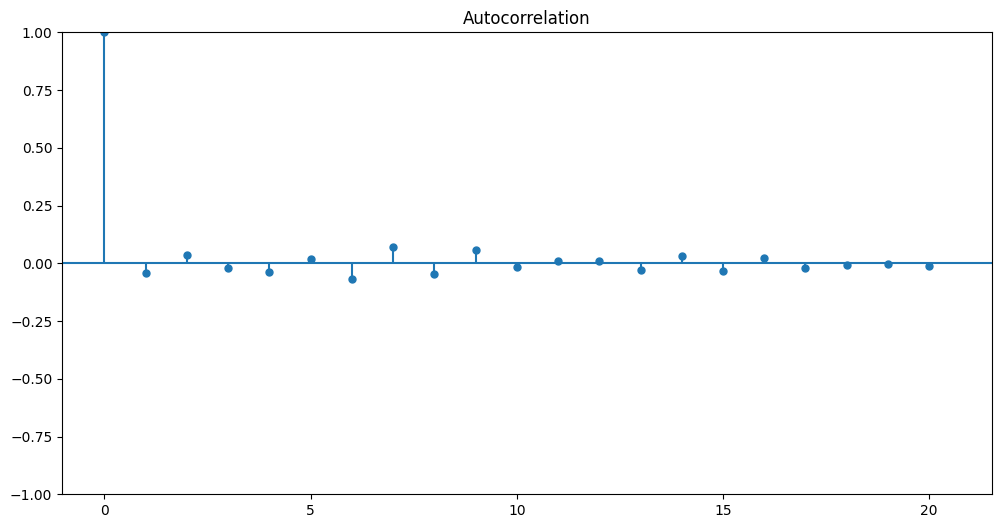

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(ts, lags=20, ax=ax)  # Adjust the 'lags' parameter as needed
plt.show()

In [29]:
df

segment,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000608,-0.000219,0.000328,0.001294,0.000584,0.000653,0.000609,0.000856,0.000729,0.000906,...,0.000289,0.000440,0.000576,-0.000172,0.000517,0.000532,0.000255,0.001032,0.000078,0.000774
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000150,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006670,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,-0.002882,0.000113,0.007991,-0.001619,...,-0.013314,0.007480,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004914,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-23,-0.003486,-0.021558,-0.022271,-0.015155,-0.016425,-0.005747,-0.023187,-0.004490,-0.009796,-0.004381,...,-0.060234,-0.004402,0.013623,-0.034509,-0.001917,-0.025647,-0.036593,-0.031807,0.046280,-0.038157
2023-05-24,-0.059468,-0.019190,-0.013273,0.001632,-0.009613,-0.001168,-0.016077,-0.019134,-0.004443,-0.012580,...,-0.007754,-0.007013,0.011184,-0.024179,-0.029576,-0.004412,-0.013045,-0.036244,-0.014291,-0.020444


ETNA model run

In [44]:
dataset

segment,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.000608,-0.000219,0.000328,0.001294,0.000584,0.000653,0.000609,0.000856,0.000729,0.000906,...,0.000289,0.000440,0.000576,-0.000172,0.000517,0.000532,0.000255,0.001032,0.000078,0.000774
2018-01-03,0.025444,-0.012266,0.009049,-0.000174,0.015649,0.003722,0.002211,0.000906,0.004615,0.018796,...,-0.010834,-0.006693,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036898,0.004645,-0.005703,-0.002225,-0.001697,0.003734,0.011841,0.012042,...,0.005415,-0.007791,0.001384,-0.000150,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.002890,-0.003945,0.008249,0.011571,...,0.006670,-0.007003,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011444
2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26,0.007783,-0.002086,0.004748,0.014105,-0.007647,-0.010343,0.007147,-0.019066,0.040581,0.059506,...,0.001089,0.000467,-0.006530,0.001355,-0.002131,0.001581,-0.001174,0.019369,0.012006,-0.003026
2023-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
HORIZON = 200

In [46]:
train_ts, test_ts = dataset.train_test_split(test_size=HORIZON)

/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/etna/datasets/tsdataset.py:145: UserWarning: You probably set wrong freq. Discovered freq in you data is D, you set None
  warnings.warn(
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/etna/datasets/tsdataset.py:145: UserWarning: You probably set wrong freq. Discovered freq in you data is D, you set None
  warnings.warn(


In [41]:
from etna.models import CatBoostMultiSegmentModel
from etna.transforms import DateFlagsTransform
from etna.transforms import DensityOutliersTransform
from etna.transforms import FourierTransform
from etna.transforms import LagTransform
from etna.transforms import LinearTrendTransform
from etna.transforms import MeanTransform
from etna.transforms import SegmentEncoderTransform
from etna.transforms import TimeSeriesImputerTransform
from etna.transforms import TrendTransform
NUMBER_OF_LAGS = 0
# Prepare transforms
transforms = [
    LinearTrendTransform(in_column="target"),
    LagTransform(in_column="target", lags=[i for i in range(1, 1 + NUMBER_OF_LAGS)], out_column="target_lag"),
]

# Prepare model
model = CatBoostMultiSegmentModel()

In [47]:
from etna.pipeline import Pipeline

# Create and fit the pipeline
pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)
pipeline.fit(train_ts)

# Make a forecast
forecast_ts = pipeline.forecast()

/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/etna/transforms/decomposition/detrend.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[self.in_column] = no_trend_timeseries
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/etna/transforms/decomposition/detrend.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[self.in_column] = no_trend_timeseries
/home/ubuntu/miniconda3/envs/fa1/lib/python3.9/site-packages/etna/transforms/decomposition/detrend.py:92: SettingWithC

CatBoostError: Input data must have at least one feature